In [8]:
import pyALT
import networkx as nx
import pickle as pk
import matplotlib.pyplot as plt

In [15]:
animal = 'a'
sensors = ['visual','tone','formlimb','hindlimb','whisker']
animals = {
    'd':'Animal_D_M022311',
    'e':'Animal_E_M090611',
    'c':'Animal_C_M022111',
    'b':'Animal_B_M021811',
    'a':'Animal_A_M022411'
}

In [10]:
pyALT.vsd.make_all_pixels_data()

results will be saved in  b-formlimb-5.pk
results will be saved in  b-tone-5.pk
results will be saved in  b-hindlimb-5.pk
results will be saved in  b-visual-5.pk


  0%|          | 0/128 [00:00<?, ?it/s]

/Users/kshadi3/Dropbox/Constantine-Majid/Animal_B_M021811/Unmasked_Data/Raw_Data/VC/vc_mean.mat
/Users/kshadi3/Dropbox/Constantine-Majid/Animal_B_M021811/Unmasked_Data/Raw_Data/AC/ac_mean.mat
/Users/kshadi3/Dropbox/Constantine-Majid/Animal_B_M021811/Unmasked_Data/Raw_Data/FL/fl_mean.mat
/Users/kshadi3/Dropbox/Constantine-Majid/Animal_B_M021811/Unmasked_Data/Raw_Data/HL/hl_mean.mat
/Users/kshadi3/Dropbox/Constantine-Majid/Animal_B_M021811/Unmasked_Data/Raw_Data/WK/wk_mean.mat


 94%|█████████▍| 120/128 [00:00<00:00, 315.30it/s]


results will be saved in  b-whisker-5.pk


 94%|█████████▍| 120/128 [00:00<00:00, 664.73it/s]


Done!


In [16]:
pixs = {}
for sense in sensors:
    with open(f'{animal}-{sense}-5.pk','rb') as f:
        pixs[sense] = pk.load(f)

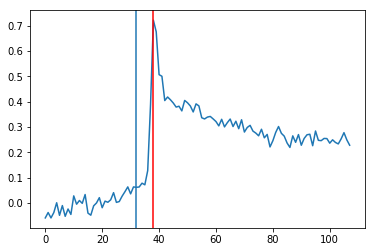

In [17]:
tup = (70, 60)
p1 = pixs['visual']
plt.plot(p1[tup].time_series)
plt.axvline(p1[tup].peak_time,color='red')
plt.axvline(32)

In [18]:
mask = pyALT.vsd.load_mask(animals[animal])

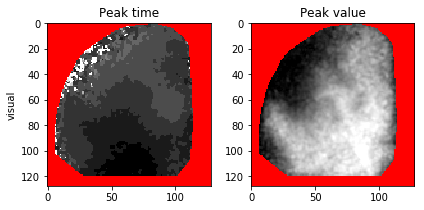

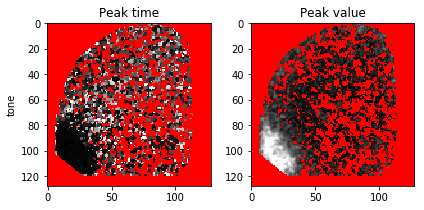

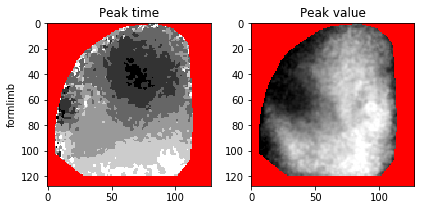

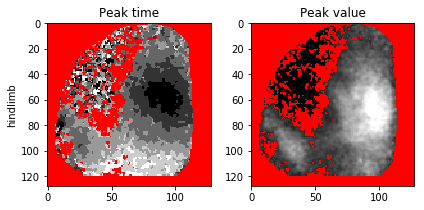

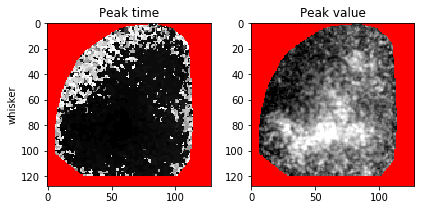

In [19]:
for i,sense in enumerate(sensors):
    fig,ax = plt.subplots(1,2)
    p1 = pixs[sense]
    im1 = pyALT.vsd.pixels_vis(p1,mask)
    im2 = pyALT.vsd.pixels_vis(p1,mask,'peak_value')
    ax[0].imshow(im1)
    ax[1].imshow(im2)
    ax[0].set_title('Peak time')
    ax[0].set_ylabel(sense)
    ax[1].set_title('Peak value')
    plt.tight_layout()

In [ ]:
def touch(i1,i2):
    if i1==i2:return False
    xd = abs(i1[-1][0]-i2[-1][0])
    yd = abs(i1[-1][1]-i2[-1][1])
    return (xd<2 and yd<2)

def prunROI(inds):
    G = nx.Graph()
    for ind1 in inds:
        for ind2 in inds:
            if touch(ind1,ind2):
                G.add_edge(ind1[-1],ind2[-1])
                G.node[ind1[-1]]['pt'] = ind1[0]
                G.node[ind1[-1]]['pv'] = ind1[1]
                G.node[ind2[-1]]['pt'] = ind2[0]
                G.node[ind2[-1]]['pv'] = ind2[1]
    V = max(nx.connected_component_subgraphs(G), key=len)
    out = []
    for w in V.nodes():
        out.append([V.node[w]['pt'],V.node[w]['pv'],w])
    return [xx[-1] for xx in sorted(out,key=lambda x:x[1],reverse=True)]
z = [[0,0,(0,0)] for _ in range(len(p1))]
print(len(z))
for i,pix in enumerate(p1):
    z[i][0] = p1[pix].peak_time
    z[i][1] = p1[pix].peak_value
    z[i][2] = (p1[pix].i, p1[pix].j)
z = list(filter(lambda x:x[0]<45,z))
z = sorted(z,key = lambda x:x[0])
q = 0
while True:
    ff = z[0][0]+q
    tmp = list(filter(lambda x:x[0]<=ff,z))
    q+=1
    if len(tmp)>10:
        z = tmp
        break
else:
    print('Cannot find enough pixels')
z = sorted(z,key = lambda x:x[0],reverse=True)
print(len(z))

In [9]:
a = [ 'a','b']
'b' in a

True